<a href="https://colab.research.google.com/github/joselcadavid/LSTM-EEG/blob/main/01_carga_y_exploracion_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Integrantes**



1.   Sofia Muñoz Ruiz CC: 1061812520
2.   Jose Cadavid CC: 1000083835
3.   Eduardo Montoya Guevara CC: 1035443241




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# ---
# PASO 1: CARGA Y EXPLORACIÓN DE DATOS
# ---

# Cargar los datos desde GitHub (raw)
url = "https://raw.githubusercontent.com/joselcadavid/Datos-EEG/b1e42aed7c72cbad3d65f252ffc22be7776f9fc5/EEG_WELCH_PermEntropy_por_banda.csv"

df = pd.read_csv(url, delimiter=';')
df.head()

,subject,diagnosis,window_index,start_time_s,end_time_s,FP2_Delta_Power,FP2_Delta_PermEntropy,FP2_Theta_Power,FP2_Theta_PermEntropy,FP2_Alpha1_Power,...,P8_Alpha2_Power,P8_Alpha2_PermEntropy,P8_Beta1_Power,P8_Beta1_PermEntropy,P8_Beta2_Power,P8_Beta2_PermEntropy,P8_Beta3_Power,P8_Beta3_PermEntropy,P8_Gamma_Power,P8_Gamma_PermEntropy
0,sub-CTR001,CTR,0,0,5,0.196249,0.487378,0.063048,0.536365,0.260909,...,0.188399,0.593150,-0.019425,0.658160,0.253148,0.690124,-0.171732,0.750953,-0.313423,0.865973
1,sub-CTR001,CTR,1,5,10,0.119187,0.492314,0.362449,0.541151,0.311259,...,-0.123612,0.594996,-0.018286,0.651274,-0.062435,0.692128,0.033958,0.744069,-0.161092,0.861950
2,sub-CTR001,CTR,2,10,15,0.160379,0.490754,0.060884,0.538279,0.329622,...,-0.255649,0.597524,0.032317,0.648964,0.203254,0.692136,0.008790,0.751999,-0.292589,0.868296
3,sub-CTR001,CTR,3,15,20,0.263136,0.498939,0.099407,0.535675,0.315838,...,0.321607,0.594624,0.138186,0.646639,-0.051989,0.691301,-0.014196,0.751305,-0.328271,0.860198
4,sub-CTR001,CTR,4,20,25,0.343240,0.495843,-0.043447,0.537672,0.179564,...,-0.075198,0.594863,0.052670,0.650695,0.238421,0.689849,-0.158806,0.747482,-0.357325,0.872565


In [ ]:
print("--- 1. Exploración Inicial ---")
print(f"Forma de los datos (filas, columnas): {df.shape}")

# Identificar cuántas ventanas (pasos de tiempo) tiene cada sujeto
window_counts = df.groupby('subject').size()
print("\nEstadísticas de 'pasos de tiempo' (ventanas) por sujeto:")
print(window_counts.describe())

--- 1. Exploración Inicial ---
Forma de los datos (filas, columnas): (5724, 133)

Estadísticas de 'pasos de tiempo' (ventanas) por sujeto:
count    124.00000
mean      46.16129
std        2.06554
min       41.00000
25%       45.00000
50%       46.00000
75%       47.00000
max       54.00000
dtype: float64


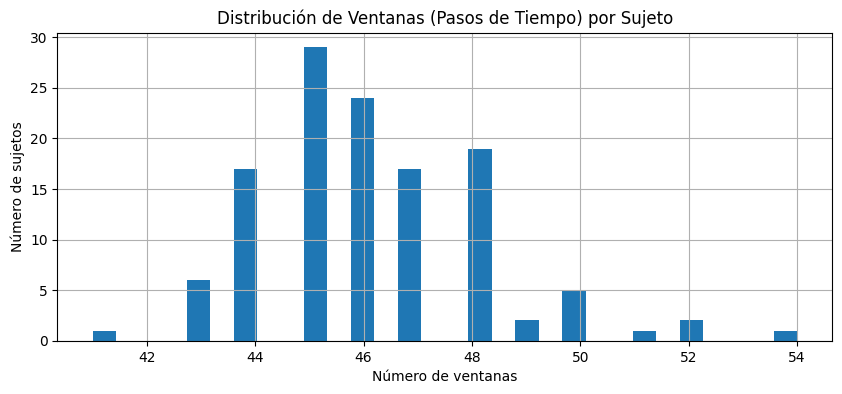

In [ ]:
# Visualizar la distribución de longitudes de secuencia
plt.figure(figsize=(10, 4))
window_counts.hist(bins=30)
plt.title('Distribución de Ventanas (Pasos de Tiempo) por Sujeto')
plt.xlabel('Número de ventanas')
plt.ylabel('Número de sujetos')
plt.show()

In [ ]:
# --- Exploración  de cantidad de sujetos---

# 1. ¿Cuántos sujetos únicos tenemos?
subjects = df['subject'].unique()
print(f"\nNúmero total de sujetos: {len(subjects)}")

# 2. ¿Cómo está el balance de clases? (Crítico para la clasificación)
print("\nBalance de clases (diagnóstico):")
print(df.groupby('subject')['diagnosis'].first().value_counts())




Número total de sujetos: 124

Balance de clases (diagnóstico):
diagnosis
CTR    38
GG     37
GU     31
DCL    18
Name: count, dtype: int64


In [ ]:
# Agrupar datos para obtener conteos reales
# Contamos sujetos únicos y total de muestras por diagnóstico
resumen = df.groupby('diagnosis').agg(
    Sujetos=('subject', 'nunique'),
    Muestras=('diagnosis', 'count')
).reset_index()

# Ordenar las clases para que aparezcan en el orden lógico (GG, GU, DCL, CTR)
orden_clases = ['GG', 'GU', 'DCL', 'CTR']
resumen['Orden'] = resumen['diagnosis'].apply(lambda x: orden_clases.index(x) if x in orden_clases else 99)
resumen = resumen.sort_values('Orden')

In [ ]:
# Definir etiquetas descriptivas para los gráficos
nombres_clases = {
    'GG': 'GG (Portadores)',
    'GU': 'GU (Controles Fam)',
    'DCL': 'DCL (Deterioro)',
    'CTR': 'CTR (Sanos)'
}

# Colores para cada grupo
colores = {
    'GG': '#FF5733',
    'GU': '#33FF57',
    'DCL': '#3357FF',
    'CTR': '#F333FF'
}

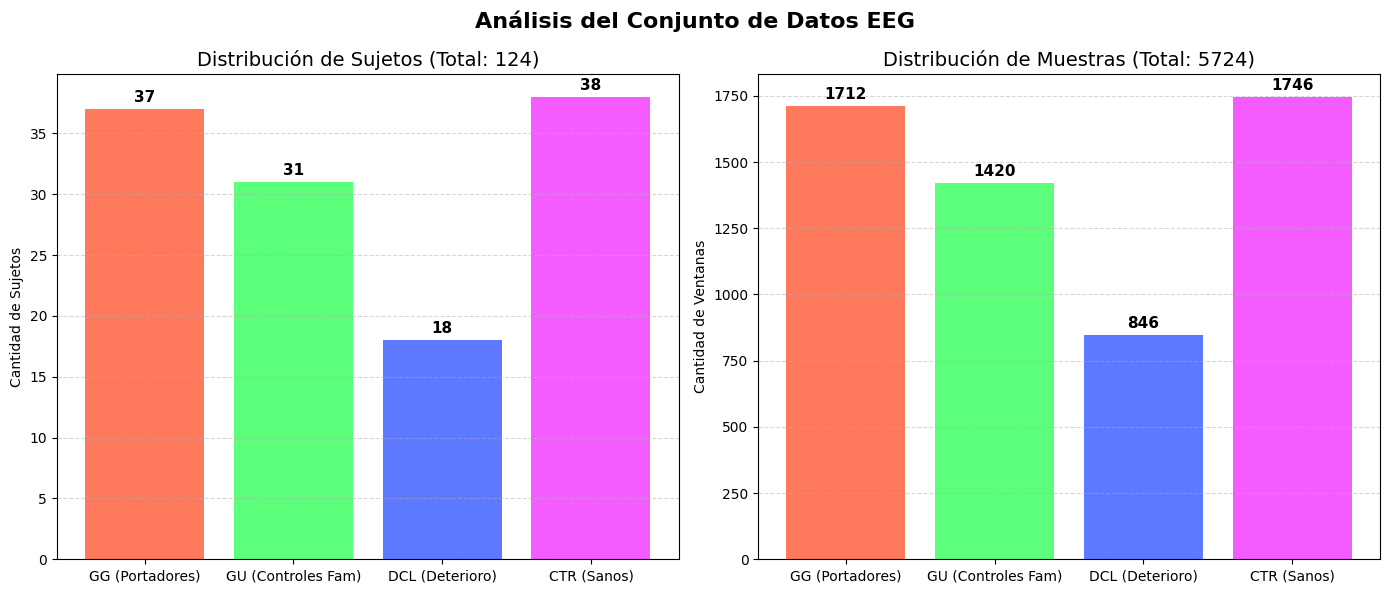

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Gráfico 1: Sujetos ---
barras1 = axes[0].bar(
    resumen['diagnosis'].map(nombres_clases),
    resumen['Sujetos'],
    color=[colores[d] for d in resumen['diagnosis']],
    alpha=0.8
)
axes[0].set_title(f"Distribución de Sujetos (Total: {resumen['Sujetos'].sum()})", fontsize=14)
axes[0].set_ylabel("Cantidad de Sujetos")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)
axes[0].bar_label(barras1, padding=3, fontweight='bold', fontsize=11)

# --- Gráfico 2: Muestras ---
barras2 = axes[1].bar(
    resumen['diagnosis'].map(nombres_clases),
    resumen['Muestras'],
    color=[colores[d] for d in resumen['diagnosis']],
    alpha=0.8
)
axes[1].set_title(f"Distribución de Muestras (Total: {resumen['Muestras'].sum()})", fontsize=14)
axes[1].set_ylabel("Cantidad de Ventanas")
axes[1].grid(axis='y', linestyle='--', alpha=0.5)
axes[1].bar_label(barras2, padding=3, fontweight='bold', fontsize=11)

plt.suptitle('Análisis del Conjunto de Datos EEG', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# Identificamos las columnas de características (excluyendo metadatos)
cols_meta = ['subject', 'diagnosis', 'window_index', 'start_time_s', 'end_time_s']
cols_features = [c for c in df.columns if c not in cols_meta]

# Análisis automático de nombres de columnas (Formato: Canal_Banda_Metrica)
# Ejemplo: FP2_Delta_Power
canales = sorted(list(set([c.split('_')[0] for c in cols_features])))
bandas = sorted(list(set([c.split('_')[1] for c in cols_features])))
metricas = sorted(list(set([c.split('_')[2] for c in cols_features])))

print("\n" + "="*60)
print(f"DESGLOSE DEL VECTOR DE CARACTERÍSTICAS (Detectado desde el archivo)")
print("="*60)
print(f"Total de columnas de características: {len(cols_features)}")
print(f"Dimensiones calculadas: {len(canales)} Canales x {len(bandas)} Bandas x {len(metricas)} Métricas = {len(canales)*len(bandas)*len(metricas)}")
print("-" * 60)
print(f"1. Canales ({len(canales)}): {', '.join(canales)}")
print(f"2. Bandas ({len(bandas)}): {', '.join(bandas)}")
print(f"3. Métricas ({len(metricas)}): {', '.join(metricas)}")
print("="*60)

print("\nRESUMEN NUMÉRICO POR CLASE:")
print(resumen[['diagnosis', 'Sujetos', 'Muestras']].to_string(index=False))


DESGLOSE DEL VECTOR DE CARACTERÍSTICAS (Detectado desde el archivo)
Total de columnas de características: 128
Dimensiones calculadas: 8 Canales x 8 Bandas x 2 Métricas = 128
------------------------------------------------------------
1. Canales (8): C3, C4, FP1, FP2, O1, O2, P7, P8
2. Bandas (8): Alpha1, Alpha2, Beta1, Beta2, Beta3, Delta, Gamma, Theta
3. Métricas (2): PermEntropy, Power

RESUMEN NUMÉRICO POR CLASE:
diagnosis  Sujetos  Muestras
       GG       37      1712
       GU       31      1420
      DCL       18       846
      CTR       38      1746
